In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # Set a white background for all visualisations
%matplotlib inline

In [3]:
import pandas_datareader.data as web

In [4]:
from datetime import datetime

In [5]:
# Set end date of stock data to be today
end = datetime.now()

# Set start date of stock data to be exactly one year ago
start = datetime(end.year-1,end.month,end.day)

In [6]:
# Make all tickr names global dataframes with one year stock data from Yahoo! finance

globals()['AAPL'] = web.DataReader('AAPL','yahoo',start,end)

In [7]:
globals()['GOOGL'] = web.DataReader('GOOGL','yahoo',start,end)

In [8]:
globals()['MSFT'] = web.DataReader('MSFT','yahoo',start,end)

In [9]:
globals()['AMZN'] = web.DataReader('AMZN','yahoo',start,end)

# This could have been done using a loop, but Yahoo! finance detects requests being pulled by a code and rejects it

In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-01-25 to 2018-01-25
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


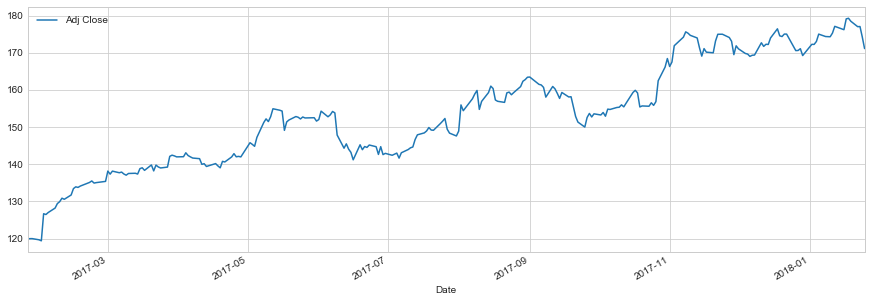

In [11]:
# Plot adjusted closing price of Apple stock for the time duration

AAPL['Adj Close'].plot(legend=True,figsize=(15,5))

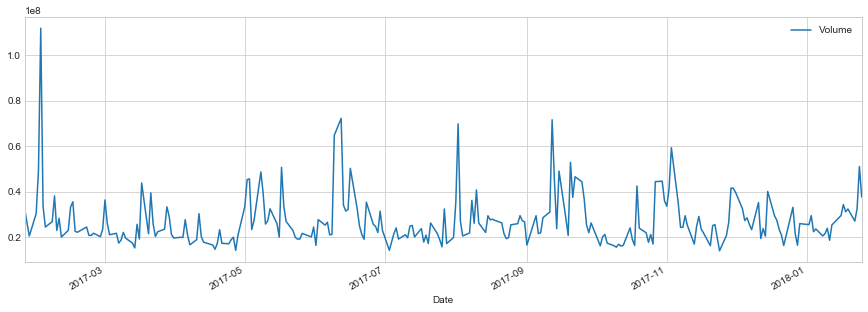

In [12]:
# Plot volume of Apple stock being traded everyday for the time duration

AAPL['Volume'].plot(legend=True,figsize=(15,5))

In [13]:
# Calculate 10-day, 20-day and 50-day moving averages for Apple stock

movavg_day = [10,20,50]

for movavg in movavg_day:
    col_name = 'MA(%s)' %(str(movavg))
    
    AAPL[col_name] = AAPL['Adj Close'].rolling(window=movavg,center=False).mean()

In [14]:
AAPL.head(15)

,Open,High,Low,Close,Adj Close,Volume,MA(10),MA(20),MA(50)
Date,,,,,,,,,
2017-01-25,120.419998,122.099998,120.279999,121.879997,119.951073,32377600,NaN,NaN,NaN
2017-01-26,121.669998,122.440002,121.599998,121.940002,120.010132,26337600,NaN,NaN,NaN
2017-01-27,122.139999,122.349998,121.599998,121.949997,120.019958,20562900,NaN,NaN,NaN
2017-01-30,120.930000,121.629997,120.660004,121.629997,119.705017,30377500,NaN,NaN,NaN
2017-01-31,121.150002,121.389999,120.620003,121.349998,119.429459,49201000,NaN,NaN,NaN
2017-02-01,127.029999,130.490005,127.010002,128.750000,126.712341,111985000,NaN,NaN,NaN
2017-02-02,127.980003,129.389999,127.779999,128.529999,126.495819,33710400,NaN,NaN,NaN
2017-02-03,128.309998,129.190002,128.160004,129.080002,127.037125,24507300,NaN,NaN,NaN
2017-02-06,129.130005,130.500000,128.899994,130.289993,128.227966,26845900,NaN,NaN,NaN


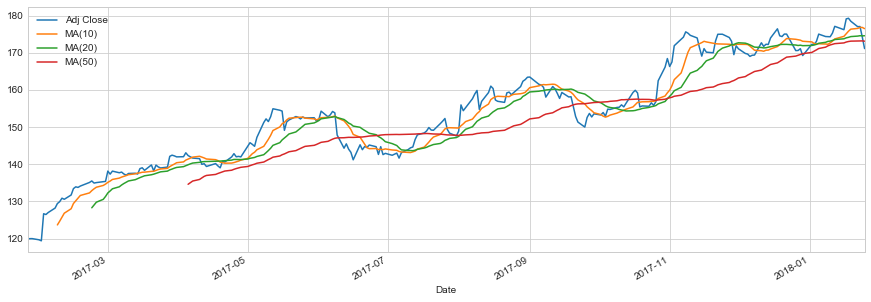

In [15]:
# Plot all calculated moving averages and closing price for entire duration

AAPL[['Adj Close','MA(10)','MA(20)','MA(50)']].plot(subplots=False,figsize=(15,5))

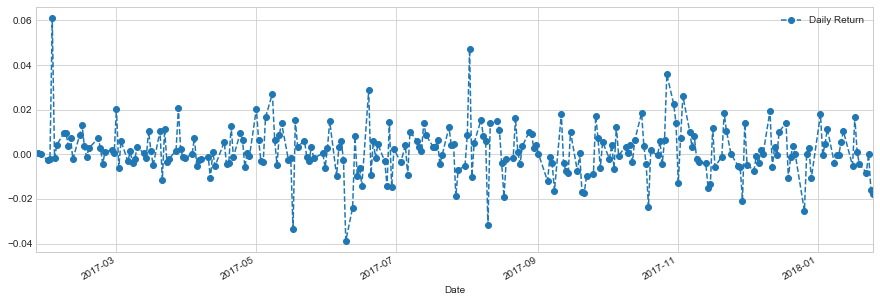

In [16]:
# Calculate and plot daily returns on Apple stock

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True,figsize=(15,5),linestyle='--',marker='o')

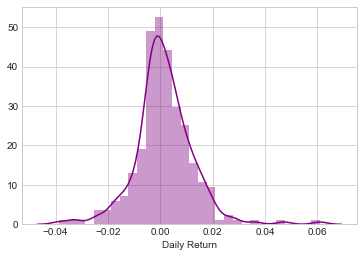

In [17]:
# Plot a histogram of daily returns to see average daily return over the year

# Null values affect seaborn library, so remove null values, if any, from daily returns column

sns.distplot(AAPL['Daily Return'].dropna(),color='purple')

In [18]:
# The plot has skewed a bit towards the right, indicating overall positive daily returns over the year

In [19]:
# After analysis on a single stock, I will now compare all the tech stocks together

# Create a new DataFrame which has all the closing prices of all the tech stocks

closing_df = DataFrame(columns=['AAPL','GOOGL','MSFT','AMZN'])

closing_df['AAPL'] = AAPL['Adj Close']

closing_df['GOOGL'] = GOOGL['Adj Close']

closing_df['MSFT'] = MSFT['Adj Close']

closing_df['AMZN'] = AMZN['Adj Close']

In [20]:
closing_df.head(10)

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2017-01-25,119.951073,858.450012,62.289162,836.520020
2017-01-26,120.010132,856.979980,62.866276,839.150024
2017-01-27,120.019958,845.030029,64.343300,835.770020
2017-01-30,119.705017,823.830017,63.707489,830.380005
2017-01-31,119.429459,820.190002,63.237980,823.479980
2017-02-01,126.712341,815.239990,62.191349,832.349976
2017-02-02,126.495819,818.260010,61.790302,839.950012
2017-02-03,127.037125,820.130005,62.289162,810.200012
2017-02-06,128.227966,821.619995,62.250042,807.640015


In [21]:
# Create a new DataFrame of the daily returns of the tech stocks

tech_returns = closing_df.pct_change()

In [22]:
tech_returns.head()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2017-01-25,NaN,NaN,NaN,NaN
2017-01-26,0.000492,-0.001712,0.009265,0.003144
2017-01-27,0.000082,-0.013944,0.023495,-0.004028
2017-01-30,-0.002624,-0.025088,-0.009882,-0.006449
2017-01-31,-0.002302,-0.004418,-0.007370,-0.008309


In [23]:
# First day values are null because there cannot be percentage change in the same day

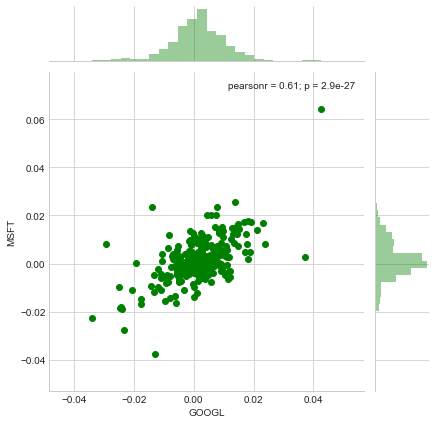

In [24]:
# Compare returns of Google and Microsoft to see if they are correlated in any manner

sns.jointplot('GOOGL','MSFT',tech_returns,kind='scatter',color='green')

In [25]:
# We can see that Google and Microsoft have slightly positively correlated returns over the year

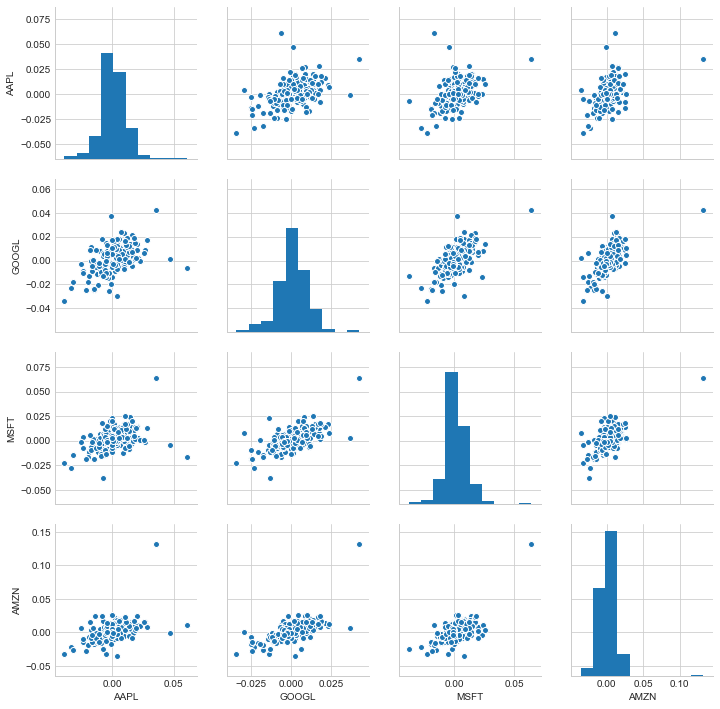

In [26]:
# Using pairplot from seaborn, we can get a matrix of plots of all possible combinations in the dataframe

sns.pairplot(tech_returns.dropna())

In [27]:
# Just from this simple visual, we can see that there are quite some correlations in the returns of these tech stocks

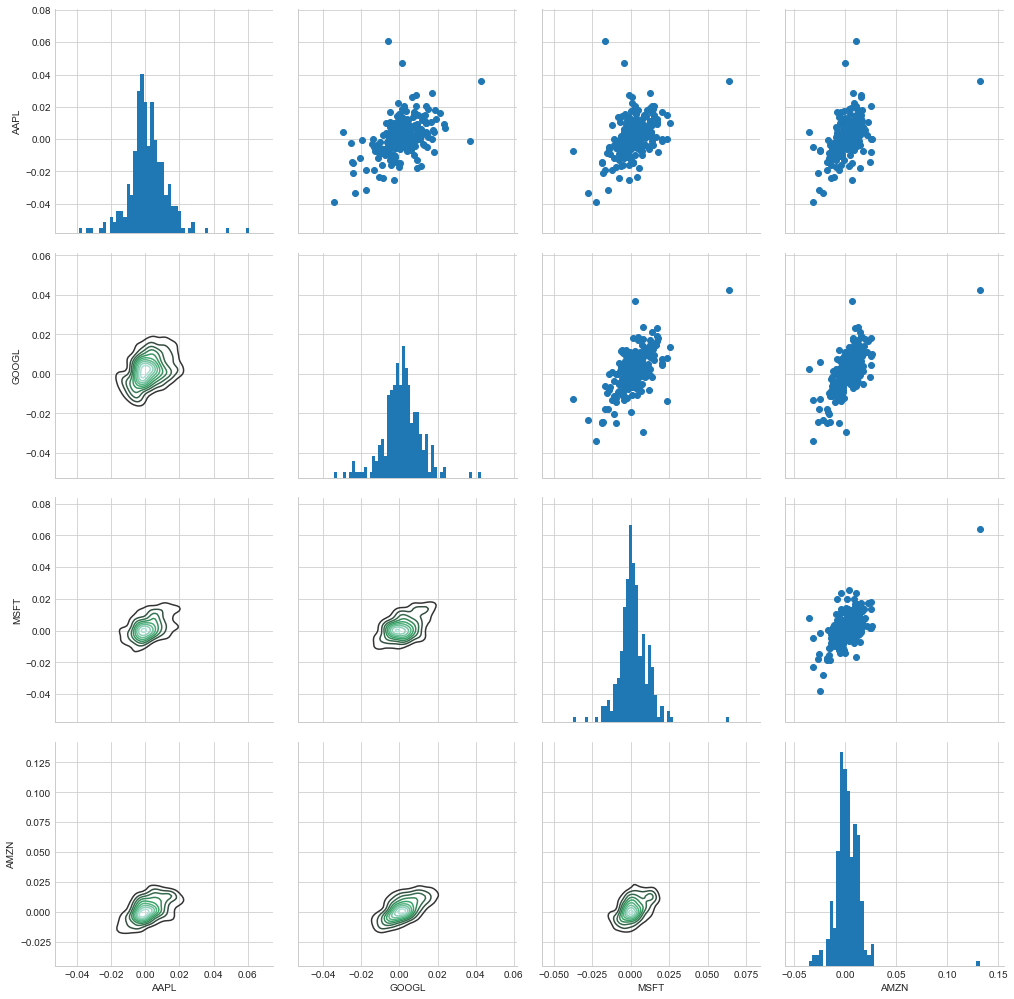

In [28]:
# To visualise the correlations even better, I will create KDE plots alongwith scatter plots

returns_fig = sns.PairGrid(tech_returns.dropna(),size=3.5) # Drop null values to avoid error in seaborn

returns_fig.map_upper(plt.scatter) # Upper triangle of matrix will be scatter plots

returns_fig.map_lower(sns.kdeplot,color='cool_d') # Lower triangle of matrix will be KDE plots

returns_fig.map_diag(plt.hist,bins=50) # Diagonal of matrix will be histograms of 50 bins each

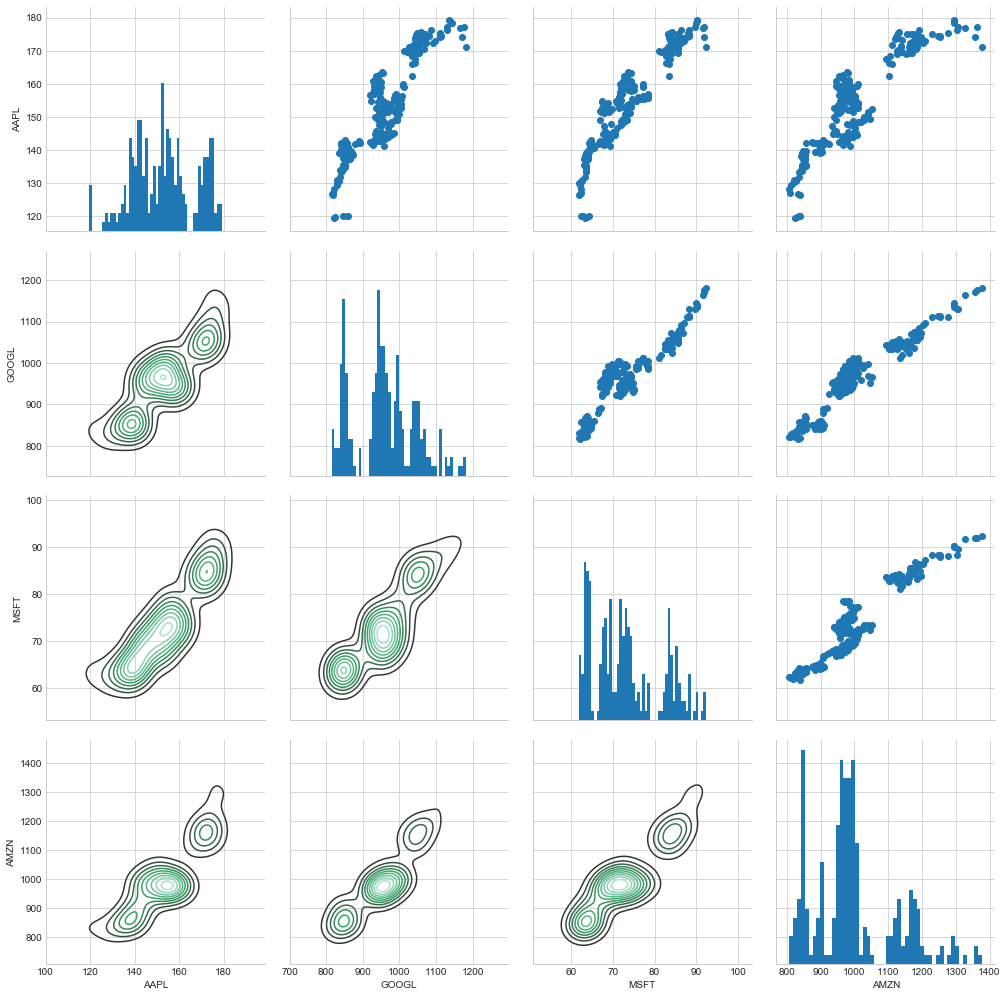

In [29]:
# Now we can check the correlations between the daily closing prices of the stocks

returns_fig = sns.PairGrid(closing_df.dropna(),size=3.5) # Drop null values to avoid error in seaborn

returns_fig.map_upper(plt.scatter) # Upper triangle of matrix will be scatter plots

returns_fig.map_lower(sns.kdeplot,color='cool_d') # Lower triangle of matrix will be KDE plots

returns_fig.map_diag(plt.hist,bins=50) # Diagonal of matrix will be histograms of 50 bins each

In [30]:
# We can easily see from this simple visual that the closing prices of these tech stocks are also highly positively correlated

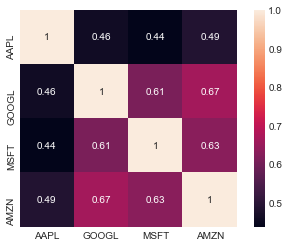

In [31]:
# To confirm the correlations that we saw with numbers, I will plot a correlation matrix with Pearson coefficients

corr = tech_returns.corr()

sns.heatmap(corr,square=True,annot=True)

In [32]:
# Here, we can see that there is a positive correlation between Amazon and Google returns of stock

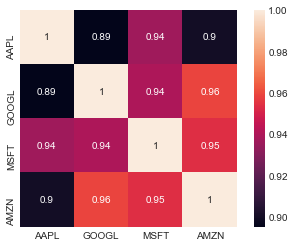

In [33]:
# Plot correlation matrix for closing prices 

corr2 = closing_df.corr()

sns.heatmap(corr2,square=True,annot=True)

In [34]:
# We can see an extremely strong correlation in the closing prices of Google and Amazon.
# Same is the case with Microsoft and Amazon. Overall all tech stocks have a high correlation in closing prices

In [35]:
# Risk analysis on the stock prices for the given time duration. I will plot expected return versus standard deviation on those
# returns, which is the risk for that stock

rets = tech_returns.dropna()

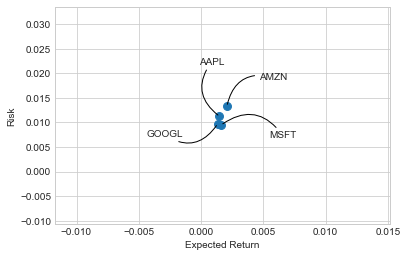

In [36]:
area = np.pi*20

plt.scatter(x=rets.mean(),y=rets.std(),s=area)

plt.xlabel('Expected Return')

plt.ylabel('Risk')

# for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
plt.annotate('AAPL', xy=(rets.mean()[0], rets.std()[0]),xytext=(5, 50),
            textcoords='offset points',ha='right',va='bottom',
            arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=0.5'))

plt.annotate('GOOGL', xy=(rets.mean()[1], rets.std()[1]),xytext=(-35, -15),
            textcoords='offset points',ha='right',va='bottom',
            arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=0.5'))

plt.annotate('MSFT', xy=(rets.mean()[2], rets.std()[2]),xytext=(75, -15),
            textcoords='offset points',ha='right',va='bottom',
            arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=0.5'))

plt.annotate('AMZN', xy=(rets.mean()[3], rets.std()[3]),xytext=(60, 25),
            textcoords='offset points',ha='right',va='bottom',
            arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=0.5'))

In [37]:
# Here we can see that Google,Apple and Microsoft provided roughly the same returns, Apple had a higher risk
# Amazon had the highest return at the highest risk out of all the tech stocks

In [38]:
# Now we will calculate the value at risk using the bootstrap method

rets['AAPL'].quantile(0.05)

-0.016099733511893994

In [39]:
# This value is interpreted as under
# On a given day, we can say with 95% confidence that our worst daily loss will be 1.60% of our stock portfolio for Apple stock
# We can calculate the value at risk for other stocks in the same way

In [40]:
rets['GOOGL'].quantile(0.05)

-0.013638256240923885

In [41]:
rets['MSFT'].quantile(0.05)

-0.012840654882384072

In [42]:
rets['AMZN'].quantile(0.05)

-0.015361122650408596

In [43]:
# Out of all the tech stocks, Microsoft had the lowest value at risk at 1.28%

In [44]:
# Now I will calculate the value at risk through Monte Carlo simulations and plot them out
# I will use the equation for Brownian motion to calculate the variation in prices over a year

time_days = 365
dt = 1/time_days
mu = rets.mean()['AAPL']
sigma = rets.std()['AAPL']

In [45]:
# Create a function for the Monte Carlo simulations

def stock_simulation(start_price,time_days,mu,sigma):
    price = np.zeros(time_days)
    price[0] = start_price
    drift = np.zeros(time_days)
    shock = np.zeros(time_days)
    
    for day in range(1,time_days):
        drift[day] = mu*dt
        shock[day] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        price[day] = price[day-1] + (price[day-1]*(drift[day]+shock[day]))
    return price

In [46]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA(10),MA(20),MA(50),Daily Return
Date,,,,,,,,,,
2017-01-25,120.419998,122.099998,120.279999,121.879997,119.951073,32377600,NaN,NaN,NaN,NaN
2017-01-26,121.669998,122.440002,121.599998,121.940002,120.010132,26337600,NaN,NaN,NaN,0.000492
2017-01-27,122.139999,122.349998,121.599998,121.949997,120.019958,20562900,NaN,NaN,NaN,0.000082
2017-01-30,120.930000,121.629997,120.660004,121.629997,119.705017,30377500,NaN,NaN,NaN,-0.002624
2017-01-31,121.150002,121.389999,120.620003,121.349998,119.429459,49201000,NaN,NaN,NaN,-0.002302


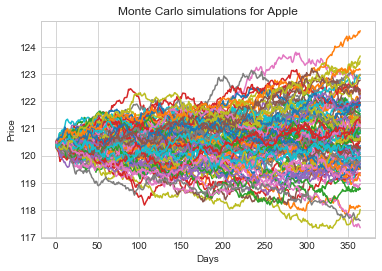

In [48]:
start_price = 120.41

for x in range(100):
    plt.plot(stock_simulation(start_price,time_days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo simulations for Apple')

In [49]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_simulation(start_price,time_days,mu,sigma)[time_days-1]

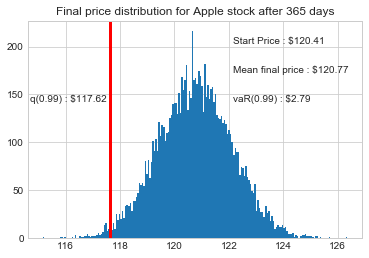

In [52]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,'Start Price : $%.2f' %start_price)

plt.figtext(0.6,0.7,'Mean final price : $%.2f' %simulations.mean())

plt.figtext(0.6,0.6,'vaR(0.99) : $%.2f' %(start_price-q))

plt.figtext(0.13,0.6,'q(0.99) : $%.2f' %q)

plt.axvline(x=q,linewidth=3,color='r')

plt.title('Final price distribution for Apple stock after %s days' %time_days)

In [53]:
# Same analysis can be done for the other tech stocks in our list

GOOGL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-25,853.549988,858.789978,849.739990,858.450012,858.450012,1655400
2017-01-26,859.049988,861.000000,850.520020,856.979980,856.979980,3493300
2017-01-27,859.000000,867.000000,841.900024,845.030029,845.030029,3752500
2017-01-30,837.059998,837.229980,821.030029,823.830017,823.830017,3516900
2017-01-31,819.500000,823.070007,813.400024,820.190002,820.190002,2020200


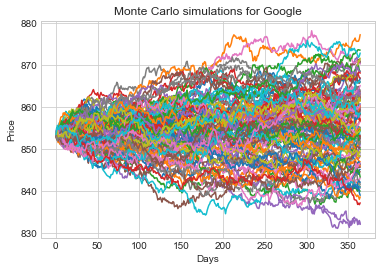

In [54]:
start_price = 853.54

for x in range(100):
    plt.plot(stock_simulation(start_price,time_days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo simulations for Google')

In [55]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_simulation(start_price,time_days,mu,sigma)[time_days-1]

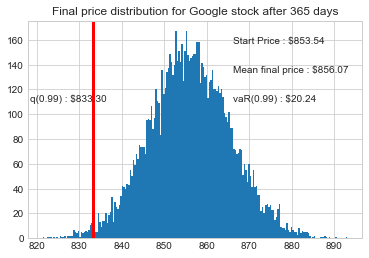

In [56]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,'Start Price : $%.2f' %start_price)

plt.figtext(0.6,0.7,'Mean final price : $%.2f' %simulations.mean())

plt.figtext(0.6,0.6,'vaR(0.99) : $%.2f' %(start_price-q))

plt.figtext(0.13,0.6,'q(0.99) : $%.2f' %q)

plt.axvline(x=q,linewidth=3,color='r')

plt.title('Final price distribution for Google stock after %s days' %time_days)

In [57]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-25,63.950001,64.099998,63.450001,63.680000,62.289162,23672700
2017-01-26,64.120003,64.540001,63.549999,64.269997,62.866276,43554600
2017-01-27,65.389999,65.910004,64.889999,65.779999,64.343300,44818000
2017-01-30,65.690002,65.790001,64.800003,65.129997,63.707489,31651400
2017-01-31,64.860001,65.150002,64.260002,64.650002,63.237980,25270500


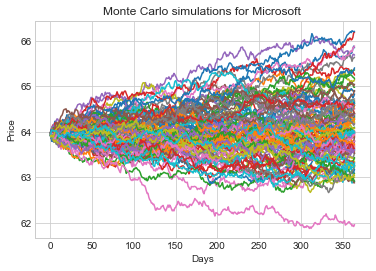

In [58]:
start_price = 63.95

for x in range(100):
    plt.plot(stock_simulation(start_price,time_days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo simulations for Microsoft')

In [59]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_simulation(start_price,time_days,mu,sigma)[time_days-1]

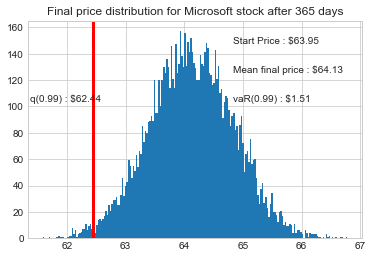

In [60]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,'Start Price : $%.2f' %start_price)

plt.figtext(0.6,0.7,'Mean final price : $%.2f' %simulations.mean())

plt.figtext(0.6,0.6,'vaR(0.99) : $%.2f' %(start_price-q))

plt.figtext(0.13,0.6,'q(0.99) : $%.2f' %q)

plt.axvline(x=q,linewidth=3,color='r')

plt.title('Final price distribution for Microsoft stock after %s days' %time_days)

In [61]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-25,825.789978,837.419983,825.289978,836.520020,836.520020,3922600
2017-01-26,835.530029,843.840027,833.000000,839.150024,839.150024,3586300
2017-01-27,839.000000,839.700012,829.440002,835.770020,835.770020,2998700
2017-01-30,833.000000,833.500000,816.380005,830.380005,830.380005,3747300
2017-01-31,823.750000,826.989990,819.559998,823.479980,823.479980,3137200


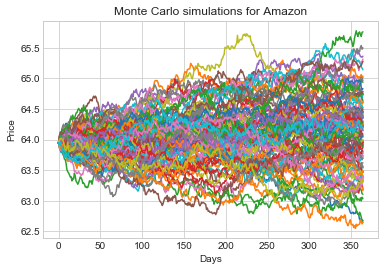

In [62]:
start_price = 63.95

for x in range(100):
    plt.plot(stock_simulation(start_price,time_days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo simulations for Amazon')

In [63]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_simulation(start_price,time_days,mu,sigma)[time_days-1]

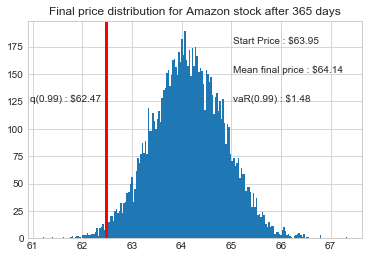

In [64]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,'Start Price : $%.2f' %start_price)

plt.figtext(0.6,0.7,'Mean final price : $%.2f' %simulations.mean())

plt.figtext(0.6,0.6,'vaR(0.99) : $%.2f' %(start_price-q))

plt.figtext(0.13,0.6,'q(0.99) : $%.2f' %q)

plt.axvline(x=q,linewidth=3,color='r')

plt.title('Final price distribution for Amazon stock after %s days' %time_days)